# Nedbør i Norge.

I denne oppgaven ser vi på tre ting:
- Hvordan tolke trendlinjer?
- Hva betyr egentlig standardavik?
- Hvordan kan vi bruke trendlinjer og standardavvik til å si noe om ekstremnedbør fremover?

Oppgavesettet [Nedbørsoppgaven: Del 1-6](https://github.com/irendundas/EkteData/tree/main/Nedb%C3%B8rsoppgaven) er laget som en hjelp til å gjøre oppgaven Nedbør i Norge. Hovedfokuset når man gjør oppgavesettet er å lære grunnleggende programmering i Python. Hovedfokuset til denne oppgaven, Nedbør i Norge, er å bruke programmering som er verktøy til å forstå og tolke naturvitenskapelige data og problemstillinger. Ved å gjøre oppgavene i Del 1-6 først går man gjennom det programmeringstekniske på forhånd, og kan fokusere mest på det naturvitenskaplige i oppgaven "Nedbør i Norge".

I tillegg starter dette skriptet med en eksempeloppgave man kan jobbe seg gjennom først. Har du gjort Del 1-6 allerede er en god del av eksempelet repetisjon. 


___________
Først må vi laste inn et par python-pakker for å kunne gjøre matematiske operasjoner og lage figurer.

In [1]:
import numpy as np # for matematikk
import matplotlib.pyplot as plt # for figurer

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
#sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
sys.path.append(r"C:\Users\iren_\Documents\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

## Et eksempel før vi setter igang

Eksempelet bruker et annet datasett enn oppgaven Nedbør i Norge, men formatet er likt, så python-kommandoene i eksempelet kan derfor brukes begge steder. Eksempelet dreier seg utelukkende om å vise hvordan man kan behandle data og lage figurer som presenterer resultatene på en måte man kan tolke videre. Oppgaver rundt selve tolkningen og diskusjon er kuttet fra eksempelet og kommer i hovedoppgaven. 

NOTE: Jeg bruker filen PrecipVestlandMonthly.txt selv om dette også er en nedbørsfil fordi denne har samme format. Jeg vil helst bruke en annen fil med samme format, men over en annen variabel. Da blir det et bedre eksempel å følge uten at det blir så lett å kopiere nøyaktig fra eksempelet.
____________
#### Stegene i eksempelet:
- Last inn filen vi vil bruke
- Orienter deg i datasettet: hva beskriver verdiene i radene, og hva med verdiene i kolonnene?
- Lag variabler hvor du lagrer dataene i kolonnene/radene du vil bruke seinere. 
- Bruk disse variablene til å lage figurer og gjøre beregninger. 

Du finner regler for indeksering og med i filen [Huskeregler](https://github.com/irendundas/EkteData/blob/main/Kom_i_gang/Huskeregler.ipynb)

Test dette gjerne ut i cellen under før du setter igang, det er fort gjort å bli forvirra her. 

In [13]:
# Definerer variabelen 'x'. 
x=np.array([1., 2., 3., 4., 5., 6.]) 
# Print betyr enkelt og greit "skriv dette". 
# Når du bruker hermetegn tolker Python det som bokstaver, istedetfor 
# verdiene som ligger i variabelen 'x' som du nettopp lagde. På denne måten 
# kan du kombinere tekst og variabel-verdier. 
print('x =',x) 
print('x[0:3] = ',x[0:3])
print('x[3:]  = x[3:6] = ',x[3:])
print('x[2:5] = ',x[2:5])

x = [1. 2. 3. 4. 5. 6.]
x[0:3] =  [1. 2. 3.]
x[3:]  = x[3:6] =  [4. 5. 6.]
x[2:5] =  [3. 4. 5.]


## Del 1: Klargjør datasettet
Nå laster vi inn datasettet vi skal bruke i eksempelet. Det er mange måter å gjøre dette på, og forskjellige fil-typer krever ulike metoder for enkel innlastning. Vi bruker funksjonen `loadData`. Da får vi inn dataene som en matrise (et array). Dette gjør det enkelt å velge ut biter av datasettet. Det er ikke alltid praktisk å se på hele datasettet på en gang. Kanskje man bare vil se på januar-verdier, eller kanskje bare fra 2000 til 2020? Dette får vi bruk for seinere i oppgaven.

In [14]:
file='PrecipVestlandMonthly.txt'
data = loadData(file, rydd='N')
data

array([[1899.  , -999.99, -999.99, ..., -999.99, -999.99,   65.86],
       [1900.  ,  117.68,   21.72, ...,  241.72,   81.8 ,  367.28],
       [1901.  ,  108.88,   81.12, ...,  184.57,  220.87,  131.04],
       ...,
       [2018.  ,  179.15,   66.43, ...,  388.1 ,   65.39,  161.33],
       [2019.  ,  205.75,  114.09, ...,  176.35,   35.85,  304.67],
       [2020.  ,  399.1 ,  361.69, ...,  159.11, -999.99, -999.99]])

Dette datasettet har flere kolonner og rader enn det notebook kan vise på en gang, derfor vises bare hjørnene til tabellen, og "..." for å vise at det egentlig er flere verdier mellom de oppgitte tallene. For å finne ut av de faktiske dimensjonene til tabellen er kommandoen shape kjempenyttig. 

In [15]:
print(data.shape) 
print(data.shape[0]) # Antall rader
print(data.shape[1]) # Antall kolonner

(122, 13)
122
13


Variablen `data` er et array med to dimensjoner. Det første tallet viser til rader, og det andre til kolonner (søyler). `data` har 122 rader, og 13 kolonner. Dette datasettet er organisert slik at de 122 radene er år, fra 1899 til 2020. Første kolonne er alle disse årene. De 12 andre kolonnene er månedene i året. Kolonne to er januar, nr 3 er februar osv. 

Av og til mangler et par verdier i et datasett. For å fylle opp tabellen selv om det ikke finnes verdier for alle datapunktene settes ofte `NaN` (Not a Number) til disse datapunktene. I dette datasettet er fyllverdiene -999.99. Det gjør det tydelig at det ikke er ekte datapunkt (det kan ikke regne -999.99 mm), men det gjør at datasettet blir vanskelig å jobbe med. Vi erstatter derfor alle tilfeller av -999.99 med `NaN` i cellen under. Det doble likhetstegnet har en viktig funksjon i programering. `data==-999.99` betyr "alle indekser i variablen `data` som har verdi -999.99". Resultatet er en tabell med samme dimensjoner som `data`, men hvor alle datapunkt er erstattet med enten `True` eller `False`. Om verdien til et datapunkt er -999.99 erstattes det med `True`, om det er alt annet erstattes det med `False`. Når man så skriver `data[data==-999.99]=np.nan` setter man alle datapunkt som er `True` til `NaN`, mens alle andre datapunkt lar man være i fred. Dette er lettest å forstå med et enkelt eksempel:

In [16]:
print('x: ',x)
print('x==3.: ',x==3.)
x[x==3.]=np.nan #Setter alle tilfeller av 3 til NaN.
print('x: ',x)

x:  [1. 2. 3. 4. 5. 6.]
x==3.:  [False False  True False False False]
x:  [ 1.  2. nan  4.  5.  6.]


Vi gjør det samme med `data`:

In [17]:
data[data==-999.99]=np.nan 
data 

array([[1899.  ,     nan,     nan, ...,     nan,     nan,   65.86],
       [1900.  ,  117.68,   21.72, ...,  241.72,   81.8 ,  367.28],
       [1901.  ,  108.88,   81.12, ...,  184.57,  220.87,  131.04],
       ...,
       [2018.  ,  179.15,   66.43, ...,  388.1 ,   65.39,  161.33],
       [2019.  ,  205.75,  114.09, ...,  176.35,   35.85,  304.67],
       [2020.  ,  399.1 ,  361.69, ...,  159.11,     nan,     nan]])

Nå er det et par nan i starten og slutten av datasettet, og kanskje et par steder midt i? Det er lett å sjekke om det er nan-verdier i datasettet ditt. Med en gang en nan-verdi er inkludert i en matematiske operasjon vil resultatet bli nan - med mindre du spesifiserer at du vil utelukke nanverdier i utregningen din. 

I cellen under er
- rad 1: den totale summen uten å spesifisere noe om nan-verdier
- rad 2: den totale summen men alle nan-verdier utelukket fra utregningen 
- rad 3: den første og siste raden er ekskludert fra summen, og resultatet er et tall. Dette betyr at det ikke finnes nan-verdier andre steder enn i første og siste rad i datasettet. I dette tilfellet er det fordi datasettet beskriver nedbør fra desember 1899 til og med oktober 2020. Resten av månedene i 1899 og 2020 er satt til NaN. 

In [18]:
print(np.sum(data))
print(np.nansum(data))
print(np.sum(data[1:data.shape[0]-1,:]))

nan
459547.4
453533.77


### Lagre tid og temp som variabler

I dette eksempelet lager vi først en figur med en tidsserie av gjennomsnittlig nedbør per måned. Tid er langs x-aksen og nedbør langs y-aksen. En ryddig måte å gjøre dette på er å først dele `data` i to tidsserier, en for tid, og en for gjennomsnitlig månedsnedbør. Sjekk [Huskeregler](https://github.com/irendundas/EkteData/blob/main/Kom_i_gang/Huskeregler.ipynb) for regler for indeksering. 

In [19]:
# Hele datasettet utenom den første kolonnen siden denne kolonnen er årene
nedbør=data[:,1:]

# Beregn gjennomsnittlig månedsnedbør per år. axis=1 beskriver at vi vil ta 
# gjennomsnittet av kolonnene slik at vi får en verdi per år. axis=0 ville 
# gitt gjenomsnitt over radene.
nedbør=np.nanmean(nedbør, axis=1)

# Alle radene og den første kolonnen
tid=data[:,0]                     

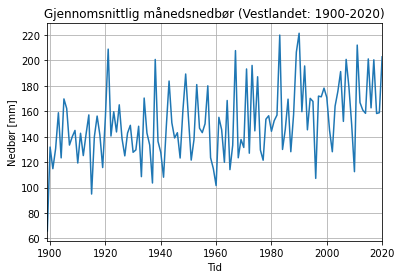

In [20]:
# plot nedbør som en funksjon av tid
plt.plot(tid, nedbør) 

# definer grensene til x-aksen. Hvis dette ikke defineres er 
# det ofte et tomrom på hver side
plt.xlim(1899, 2020)  

# navn på x-aksen
plt.xlabel('Tid')

# navn på y-aksen
plt.ylabel('Nedbør [mm]') 

# Tittel
plt.title('Gjennomsnittlig månedsnedbør (Vestlandet: 1900-2020)') 

# Vis rutenett i bakgrunnen.
plt.grid() 

## Del 2: Trendlinjer
I dette eksempelet og i selve oppgaven diskuterer vi resultatene vi får når vi bruker NumPy sin funksjon for å lage regresjonslinjer.

Figuren under viser samme figur som over, men med en trendlinje. Vi bruker `np.polyfit()` for å finne koeffisientene `a` og `b` som vi trenger for å lage trendlinjen. I denne oppgaven fokuserer vi ikke på nøyaktig hvordan funksjonen `np.polyfit()` fungerer. Det som er viktig i denne omgang er hva `a` og `b` beskriver, og tolkningen av hva denne og andre trendlinjer beskriver. Husk ligningen for å beskrive en linje: `y=ax+b`.

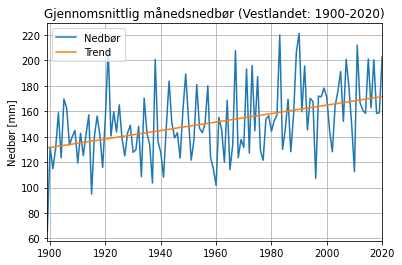

In [21]:
# Siden vi plotter to ting i denne figuren må vi ha med en tekstboks som 
# forklarer hva hver linje beskriver (en "legend"). Beskrivelsen av hvert 
# element settes med label=" ", i dette tilfellet Nedbør og Trend.
plt.plot(tid, nedbør, label='Nedbør') 

# Bruk polyfit() til å finne koeffisientene a og b til trendlinjen
# Ett-tallet betyr at vi vil ha en første ordens tilpasset linje til datasettet
a, b = np.polyfit(tid, nedbør, 1)   

# Husk: y=ax+b
plt.plot(tid, a*tid + b, label='Trend')

# "legend" er tekstboksen som beskriver hvilket element som hører til 
# hvilken parameter. "loc" står for "location". 
plt.legend(loc='upper left')

plt.xlim(1899, 2020)
plt.ylabel('Nedbør [mm]')
plt.title('Gjennomsnittlig månedsnedbør (Vestlandet: 1900-2020)')
plt.grid()

## Del 3: For-løkker

En annen ting du får nytte av i oppgaven er "for-løkker". Det er nyttig hvis du skal gjøre nesten det samme flere ganger. Koden din blir både mer ryddig og mer effektiv*. 
Hvis du vil studere f.eks. halve tidsperioden av gangen og lage en trendlinje for hver halvdel av tidsserien kan dette gjøres med en for-løkke der du først regner ut trendlinjen til 1900-1960, og så 1960-2020. Ofte er det viktig å lagre resutatet som elementer i en liste (vektor) etter hver iterasjon i for-løkken, hvis ikke vil resultatet overskrives ved neste iterasjon. I denne oppgaven er imidlertid hovedoppgaven å tolke resultatet, og vi plotter derfor figuren direkte i for-løkken. Derfor trenger vi ikke lagre `a` og `b` i en liste akkurat nå. Vi kommer tilbake til hvordan vi kan lagre verdiene underveis litt seinere i eksempelet.

Når vi under skriver "`for i in range(2):`" betyr dette "`for i=0`, gjør operasjonen beskrevet under. Når det er ferdig, gjør det samme `for i=1`". `range(2)` er altså `0` og `1`. `range(5)` er tilsvarende `0` til og med `4`. 

\* Dette er ikke alltid sant. Hvis du kan bruke vektoroperasjoner eller "true/false"-operasjoner istedet er dette stort sett mer effektivt. For-løkker er effektive der alternativet er å skrive ut hver enkelt nesten helt like linje i sin helhet. Dette trenger du ikke ta stilling til i denne oppgaven, men det er greit å ha i bakhodet i videre programmering.

Først trenger vi indeksene som deler datasettet vårt inn i to like lange perioder:

In [24]:
# Linjen under lager variabelen "id": en liste som kan dele datasettet vårt inn
# i to like lange tidsserier slik at vi kan se på periodene 1900-1960 og 
# 1960-2020 hver for seg. 
# - 0 er starten på datasettet
# - int(np.round(len(tid)/2)) = 61 er midten av datasettet. 
# - np.round konverterer til et heltall, som er nødvendig for indeksering. 
# - int konverterer til "integer": tall uten desimaler, nødvendig for indekser 
# - len(tid)-1 er slutten av datasettet. -1: fordi python begynner 
# indekseringen sin med 0. 
ind=[
    0,
    int(np.round(len(tid)/2)),
    len(tid)-1
] 

print('id = ',ind)
               

id =  [0, 61, 121]


`tid[0:61] = tid[id[0]:id[1]]` og `tid[61:121] = tid[id[1]:id[2]]`. 

Når `i=0` er også f.eks. `tid[0:61] = tid[id[0]:id[1]] = tid[id[i]:id[i+1]]`.

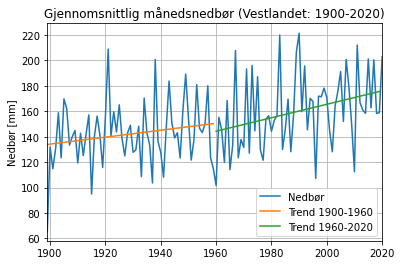

In [28]:
plt.plot(tid, nedbør, label='Nedbør')

# Dette er en liste med to tekstlinjer ("string") som skal brukes som "label" 
# inne i for-løkken under.
string=('Trend 1900-1960', 'Trend 1960-2020')  

for i in range(2):
    # I første runde (i=0) finner vi m og b for 1900-1960. 
    # I andre runde (i=1) finner vi m og b for 1961-2020.
    a, b = np.polyfit(tid[ind[i]:ind[i+1]], nedbør[ind[i]:ind[i+1]], 1) 
    # I første runde plotter vi den oransje trendlinjen. 
    # I andre runde plotter vi den grønne trendlinjen.
    plt.plot(
        tid[ind[i]:ind[i+1]], a*tid[ind[i]:ind[i+1]] + b, 
        label=string[i]
    ) 
    
plt.legend(loc='lower right')
plt.xlim(1899, 2020)
plt.ylabel('Nedbør [mm]')
plt.title('Gjennomsnittlig månedsnedbør (Vestlandet: 1900-2020)')
plt.grid()

### Lagre variabler i for-løkke
Når man trenger å lagre resultater underveis i en for-løkke er det praktisk å først lage et array som kan fylle opp med verdier. Du må derfor vite hvilke dimensjoner det totale resultatet ditt skal ha. Vil du for eksempel dele tidsserien `nedbør` inn i fire perioder istedet for to, og lagre koeffisientene `a` og `b` til alle fire trendlinjene må `a` og `b` lagres i arrays med plass til fire elementer. 

Når man lager arrays på forhånd som man etterpå fyller med resultat er det tre veldig nyttige funksjoner man kan bruke: `np.zeros`, `np.ones` og `np.empty`. `np.empty` gir tilfeldige verdier, og er et raskt alternativ når det er snakk om store datamengder. Vi holder oss til `np.zeros` og `np.ones`, som gir en tabell fylt med `0` eller `1` i de dimensjonene du spesifiserer. Ved å bruke disse funksjonene er det lett å sjekke om du har fått til å gjøre det du ville: om elementene fremdeles er `0` eller `1` etter at du har kjørt koden din er det sannsynlig at noe er gått galt, og at resultatene dine ikke er blitt skrevet inn i den tomme tabellen din slik du ville. 

In [31]:
# lag en liste med 4 elemeter, ett for hver av de fire trendlinjene
a=np.zeros(shape=(4))
b=np.copy(a)
a

array([0., 0., 0., 0.])

In [30]:
# Her gjør vi nøyaktig det samme som tidligere, bare at vi finner indeksene vi 
# trenger for å dele tidsserien inn i fire like deler istedet for to like deler.  
id=[
    0,                               
    int(np.round(len(tid)/4)),     
    2*int(np.round(len(tid)/4)),
    3*int(np.round(len(tid)/4)),
    len(tid)-1
] 

id

[0, 30, 60, 90, 121]

In [32]:
for i in range(4):
    # ved å skrive a[i] og b[i] lagrer vi a og b til de fire trendlinjene i
    # de to listene med 0 vi definerte rett over. 
    a[i], b[i] = np.polyfit(tid[id[i]:id[i+1]], nedbør[id[i]:id[i+1]], 1)
    
print('a=',a)
print('b=',b)

a= [ 0.928165    0.58969503  0.87775028 -0.19897984]
b= [-1636.36511284 -1000.63571042 -1583.31897936   567.92492473]


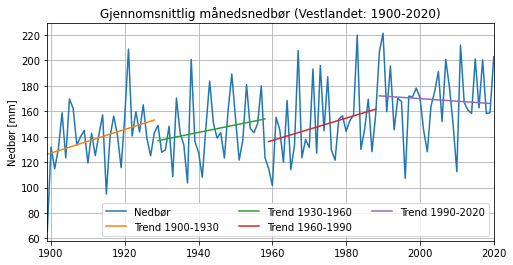

In [36]:
string=(
    'Trend 1900-1930','Trend 1930-1960','Trend 1960-1990','Trend 1990-2020'
) 

# Sett figur-strørrelsen: 8 enheter langs x-aksen og 4 enheter langs y-aksen.
plt.figure(figsize=(8, 4))
ax=plt.axes()

# Plot selve tidsserien
ax.plot(tid, nedbør, label='Nedbør')

# Plot hver av de fire trendlinjene
for i in range(4):
    ax.plot(
        tid[id[i]:id[i+1]], # x-verdi
        a[i]*tid[id[i]:id[i+1]] + b[i], # y-verdi: ax+b 
        label=string[i]
    )
    
ax.legend(loc='lower right', ncol=3)
ax.set(
    xlim=(1899, 2020),
    ylabel='Nedbør [mm]',
    title='Gjennomsnittlig månedsnedbør (Vestlandet: 1900-2020)'
)

plt.grid()

Nå kan `a` og `b` undersøkes videre for å for eksempel se på hvordan stigningstallene til trendlinjene har endret seg over tidsperioden 1900-2020

In [ ]:
string=('1900-1930','1930-1960','1960-1990','1990-2020')
x=np.linspace(1,6,6) # Dette er kun en liste fra 1 til 6 med steg 1. Vi lager den slik at vi kan plotte stigningstallene jevnt.
                     # Selv om vi kun skal plotte 4 markører lager vi den seks steg lang. Dette er for å få plottet til å se
                     # ryddig ut: vi plotter sevstendige markører og ikke linjer, og da er det fint med litt rom på sidene. 

for i in range(4):
    plt.plot(x[i+1],a[i],'C'+str(i)+'*',label=string[i],markersize=12) # Her får vi bruk for at vi lagde x 6 steg lang: vi 
                                                                       # plotter markørene til de fire midterste x-verdiene: 
                                                                       # 2,3,4 og 5. 
                                                                       # Da kan man etterpå la xlim være fra 1 til 6
    # 'C'+str(i)+'*' definerer farge: 'C'+str(i) og markør: '*'. 
    # Se denne linken for python sine default farger (C0 til C9): https://matplotlib.org/stable/users/dflt_style_changes.html

plt.legend(loc='upper right')
plt.xlim(x[0],x[len(x)-1])    # (x[0],x[len(x)-1]) er det samme som (1,6)
plt.grid(True)
labels=[string[0],string[1],string[2],string[3]] # Vi vil ikke ha tallene 1 til 6 på x-aksen, men tidsperiodene "a" er beregnet
                                                 # ut ifra. 
plt.xticks([2,3,4,5], labels) # Her definerer vi hvilke x-verdier som skal markeres langs aksen, og hvilken tekst som skal stå. 
                              # Hadde vi beregnet mangle flere trendlinjer kunne det f.eks vært mer oversiktlig å kun markere 
                              # annenhver indeks. Da ville man skrevet labels=[string[0],string[2]] og plt.xticks([1,3], labels)
plt.xlabel('Tidsperiode')
plt.ylabel('Stigningstall')
plt.title('Endring i nedbør over Vestlandet (1900-2020)')
plt.show()

# Del 3: Standardavvik (std). 
Standardavvik (std) sier noe om hvor mye verdiene til en parameter varierer i forhold til gjennomsnittet, eller spredningen til datapunktene. Dette kan være variasjon over et geografisk område, variasjon over høyde eller dyp, eller variasjon med tid. Vi skal bruke std til å se på variasjon i nedbør over tid.  

I del 1 av denne oppgaven så vi at trendlinjene avhenger mye av hvilken periode vi ser på, og hvilken måned av gangen. Vi tar utgangspunkt i kode-cellen der vi delte tidsserien i to og så på trendlinjer før og etter 1960 (celle nr 11), og sjekker hvordan std var for disse to periodene. 

In [ ]:
x = np.empty(shape=(2)) # En tom liste med plass til to tall
y = np.empty(shape=(2))

id=[0,
    int(np.round(len(tid)/2)),
    len(tid)-1]

# I for-løkken under gjør vi to matematiske operasjoner etter hverandre for å finne både x og y: 
# for x tar vi først gjennomsnitt og så runder vi til nærmeste heltall.
# for y tar vi først standardavvik og så runder vi til nærmeste heltall.
# Operasjonen som er inderst gjøres først, så operasjonen(e) utenfor. Dette komprimerer koden og gjør at man slipper å lage
# så mange mellomsteg-variabler som man egentlig ikke trenger å lagre. 
for i in range(2):
    x[i]=np.round(np.mean(nedbør[id[i]:id[i+1]])) # Gjennomsnitt over periode #1 (i=0), og gjennomsnitt over periode #2 (i=2) 
    y[i]=np.round(np.std(nedbør[id[i]:id[i+1]]))  # Standardavvik over periode #1 og #2. 

print('Gjennomsnitt: x = ',x)
print('Standsrdavvik: y = ',y)

En vanlig måte å fremstille disse statistiske verdiene på er å markere gjennomsnittet og std som punkter, slik som i figuren under. Her er de røde stjernene gjennomsnittet, og de grønne prikkene pluss/minus std. 

In [ ]:
plt.plot(1,x[0],'r*',markersize=12) # plott gjennomsnitt for periode #1
                                    # 'r*' beskriver markøren: r=rød, *=stjerne
plt.plot(1,x[0]-y[0],'go')          # plott gjennomsnitt minus standardavviket for periode #1. 
                                    # 'go' beskriver markøren: g=grønn, o=dot
plt.plot(1,x[0]+y[0],'go')          # plott gjennomsnitt pluss standardavviket for periode #1
plt.plot(2,x[1],'r*',markersize=12) # Samme som over men for periode #2.
plt.plot(2,x[1]-y[1],'go')
plt.plot(2,x[1]+y[1],'go')
plt.xlim(0,3)
labels=['1900-1960', '1960-2020']
plt.xticks([1,2], labels)
plt.xlabel('Tidsperiode')
plt.ylabel('Nedbør [mm]')
plt.title('Nedbør over Vestlandet (1900-1960 og 1960-2020)')
plt.grid(True)

# Vi trenger en legend i denne figuren også, men vi vil unngå å ha fire grønne og to røde elementer i legenden. 
# Derfor plotter vi et grønt og et rødt merke, men vi plotter det ved (nan,nan) i griddet slik at elementet ikke synes. 
# Dette er en oversiktlig måte å ha oversikt på legenden. 
plt.plot(np.nan,np.nan,'r*',markersize=12,label='Gj.snitt') 
plt.plot(np.nan,np.nan,'go',label='Std')
plt.legend(loc='upper left')

I koden over er det mange, nesten helt like linjer. Når det ser slik ut kan koden ofte gjøres mer effektiv, for eksempel med en for-løkke. Den kan for eksempel se ut som dette. Legg merke til at figuren ser helt lik ut, selv om det er færre kode-linjer.

In [ ]:
for i in range(2):
    plt.plot(i+1,x[i],'r*',markersize=12)
    plt.plot(i+1,x[i]-y[i],'go')
    plt.plot(i+1,x[i]+y[i],'go')
    
plt.xlim(0,3)
labels=['1900-1960', '1960-2020']
plt.xticks([1,2], labels)
plt.xlabel('Tidsperiode')
plt.ylabel('Nedbør [mm]')
plt.title('Nedbør over Vestlandet (1900-1960 og 1960-2020)')
plt.grid(True)

plt.plot(np.nan,np.nan,'r*',markersize=12,label='Gj.snitt') 
plt.plot(np.nan,np.nan,'go',label='Std')
plt.legend(loc='upper left')

Nå representerer hver stjerne 60 år med nedbørsdata. 

Tatt i betraktning den tydelige forskjellen i trendlinjene til disse to periodene er 60 år ganske lenge. Hva skjer hvis vi istedet ser på ti år av gangen? Vi modifiserer koden over der vi delte tidsperioden inn i to (celle nr 11), og deler den i stedet inn i 12, for 12 tiår. 

Før man lager en figur er det ofte nyttig å se på dataene man har, hvis størrelsen på datasettet tillater det.

In [ ]:
x = np.empty(shape=(12))
y = np.empty(shape=(12))
t = np.empty(shape=(12))

id=np.linspace(1,len(tid)-1,13) # Vi har brukt np.linspace tidligere for å lage lister mellom to verdier med steg 1. 
                                # I dette tilfellet skal vi imidlertid finne indekser til å skille hvert tiår. 
                                # Dette blir altså fra 1 til 120 "len(tid)" med 13 steg. Vi kutter 1899 og begynner i 1900
                                # for at tiårene skal bli logisk inndelte. Siden 1899 stort sett har "NaN"-verdier kan dette 
                                # valget lett forsvares.
                
print('id = ',id)               # Vi printer "id" her for å kotrollere at resultatet er slik vi vil.

for i in range(12):
    x[i]=np.round(np.mean(nedbør[int(id[i]):int(id[i+1])])) # Gjennomsnittet for hvert tiår
    y[i]=np.round(np.std(nedbør[int(id[i]):int(id[i+1])]))  # Standardavviket for hvert tiår    

print('x = ',x)
print('y = ',y)

t=np.linspace(1905,2015,12) # Midtpunktet av hvert tiår

print(t)

Etter å ha sett på dataene og fått oversikten lager vi en ny figur.

In [ ]:
for i in range(12):
    plt.plot(t[i],x[i],'r*',markersize=12)  # plott gjennomsnitt for periode #1
    plt.plot(t[i],x[i]-y[i],'go')           # plott gjennomsnitt minus standardavviket for periode #1. 
    plt.plot(t[i],x[i]+y[i],'go')           # plott gjennomsnitt pluss standardavviket for periode #1
    
plt.xlim(1900,2020)
plt.xlabel('Tid')
plt.ylabel('Nedbør [mm]')
plt.title('Nedbør over Vestlandet per tiår (1900-2020)')
plt.grid(True)

plt.plot(np.nan,np.nan,'r*',markersize=12,label='Gj.snitt') 
plt.plot(np.nan,np.nan,'go',label='Std')
plt.legend(loc='upper left')

# Del 4: Får vi snø til jul og varme somre fremover?

For å vurdere dette ser vi på endring i standardavvik for hver årstid hver for seg.

In [ ]:
# Vi definerer variablen "nedbør" på nytt som all nedbørsdata (frem til nå var "nedbør" månedsgjennomsnitt per år)
nedbør=data[:,1:]

# Del datasettet inn i årstider
winter2=nedbør[1:,1:3] # Vinter er litt tricky siden januar og februar, og desember samme år ikke hører til samme vinter. 
winter1=nedbør[0:len(nedbør)-1,12:] # Vi må ha med ":" etter 12 for å få det på tabell-format (array) slik som "winter2" og 
                                    # ikke en liste. Siden vi skal sette "winter1" og "winter2" sammen til en tabell rett under
                                    # er det viktig at "winter1" og "winter2" er på samme format. 
# Nå er "winter2" alle januar og februarmånedene fra og med 1900, mens "winter1" er desember fra 1899 til 2019.

# np.concatenate setter sammen to tabeller. "axis" bestemmer langs hvilken akse de skal settes sammen.
winter=np.concatenate((winter1,winter2),axis=1) 

In [ ]:
# Vi viser dette med et kort eksempel:
x1=np.array([[1.,2.,3.],[4.,5.,6.]]) # "x1" og "x2" er begge 2x3 tabeller
x2=np.array([[0,0,0],[0,0,0]])
x=np.concatenate((x1,x2),axis=0) 
print('concatenate langs akse 0: ',)
print(x)
x=np.concatenate((x1,x2),axis=1) 
print('concatenate langs akse 1: ',)
print(x)

In [ ]:
# Vi kutter 1899 siden alle verdiene for disse årstidene er NaN. 
spring=nedbør[1:,2:5] # 2:5 representerer mars, april og mai
summer=nedbør[1:,5:8]
fall=nedbør[1:,8:11]

# Ta gjennomsnitt av hver årstid
winter=np.mean(winter,axis=1) 
spring=np.mean(spring,axis=1)
summer=np.mean(summer,axis=1)
fall=np.nanmean(fall,axis=1)   # for "fall" bruker vi np.nanmean fordi vi inkluderer en NaN-verdi i 2020. Når man ikke er helt 
                               # sikker på hvor det er NaN i datasettet kan man ha som praksis å alltid bruke nanmean i 
                               # tilfeller som dette. Men det beste er stort sett å skaffe seg oversikt over datasettet før man
                               # man begynner å jobbe med dataene (slik som vi gjorde i starten av dette eksempelet), så vet du
                               # når du trenger å bruke "nanmean" og når "mean" holder. 

Figuren under viser nedbør over Norge midlet over årstidene.

In [ ]:
string=('Vinter','Vår','Sommer','Høst')
plt.plot(tid[1:],winter, label=string[0]) # Vi bruker tid[1:] siden vi rett over valgte å kutte ut 1899.
plt.plot(tid[1:],spring, label=string[1])
plt.plot(tid[1:],summer, label=string[2])
plt.plot(tid[1:],fall, label=string[3])
plt.legend(loc='upper left')
plt.xlim(1900,2020)
plt.xlabel('Tid')
plt.ylabel('Nedbør [mm]')
plt.title('Nedbør over Vestlandet (1900-2020)')
plt.grid(True)

Vi ser til slutt på standardavvik for hvert tiår, for hver årstid.

In [ ]:
seasons = np.empty(shape=(121,4)) # En tom tabell som vi fyller verdiene fra sesongene inn i
seasons[:,0]=winter # Kolonne 0: vinter-veridiene
seasons[:,1]=spring # Kolonne 1: vår-veridiene
seasons[:,2]=summer
seasons[:,3]=fall

# En tom tabell med 12 rader: årene, og 4 kolonner: årstidene. Her fyller vi seinere inn verdier for standardavvik
y = np.empty(shape=(12,4))


id=np.linspace(0,len(tid)-1,13) # Dette er den samme listen som vi lagde tidligeresom vi brukte for å dele årene inn i tiår.
t=np.linspace(1905,2015,12)     # Midtpunktet av hvert tiår (Også lik en liste vi lagde over)

Under har vi en dobbel for-løkke. Husk at vi rett over definerte "y" der radene er tiårs-bolker, og kolonnene er årstidene. Når vi under skriver "`for j in range(4)`" refererer dette til de fire kolonnene/årstidne. "`for i in range(12)`" refererer til de 12 tiårs-bolkene.

Den eneste forskjellen her fra det vi har gjort tidligere er at vi først tar stilling til vinter (`seasons[j=0]`), så vår (`seasons[j=1]`), så sommer (`seasons[j=2]`) og til slutt høst (`seasons[j=3]`).
Mellomstegsvariablen "a" lager vi for å være ryddig og lage litt bedre oversikt over hva for-løkkene beregner hvor.

Resultatet lagres i tabellen "y" som vi lagde rett over. 

In [ ]:
for j in range(4): # Vi itererer gjennom de fire årstidene
    a=seasons[:,j] # Runde 1 (j=0) setter vi a=vinter, runde 2: a=vår osv. 
    for i in range(12):
        y[i,j]=np.round(np.nanstd(a[int(id[i]):int(id[i+1])])) 


In [ ]:
string=('Vinter','Vår','Sommer','Høst')

# Så plotter vi resultatet: standardavvik for hver årstid (først vinter, så vår osv.) over tid. 
for j in range(4):
    plt.plot(t,y[:,j],label=string[j])
    
plt.legend(loc='upper left')
plt.xlim(1900,2020)
plt.xlabel('Tid')
plt.ylabel('Std')
plt.title('Std av nedbør over Vestlandet per årstid (1900-2020)')
plt.grid(True)

# Start: Oppgave 1

Denne oppgaven er basert på eksempelet over: Alle problemer som har med programmering å gjøre skal det finnes svar på over. Husk også at det ikke er meningen at du skal huske alle kommandoer og detaljer i hodet. Alle som jobber med programmering bruker konstant gamle koder de har skrevet som "oppslagsverk" og googler konstant. Når du googler kan du ofte være veldig spesifikk, det er stort sett noen som har lurt på nøyaktig det du lurer på før, og Q&A-forum er ofte veldig gode. Hvis det er en spesifikk funksjon du trenger å vite hvordan fungerer (f.eks np.round, np.std eller np.concatenate) så er det nyttig å slenge på kodeordet "documentation" så kommer du til selve beskrivelsen av siden og styrer unna Q&A-forum. Her er f.eks. siden til np.concatenate: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html. Disse sidene har også ofte enkle og greie eksempler. 

Ellers, husk at `x.shape` og `print(x)` er veldig nyttige, for å få oversikt over hva slags data det egentlig er du jobber med, og hvordan en tabell eller liste endrer seg som følge av en funksjon. 


### Del 1: gjør klar datasettet
a) Last inn datasettet `PrecipNorgeMonthly.txt` med `loadData`

b) Sett verdier som er -999.99 til NaN.

c) Sjekk hvor i datasettet du nå har NaN-verdier slik at du seinere vet når du må ta stilling til NaN.

d) Lag to variabler: en for tid, og en for gjennomsnittlig månedsnedbør per år.

### Del 2: undersøk gjennomsnittsveridier og trendlinjer
I denne oppgaven ser vi ikke på hvordan man lager en regresjonslinje til datapunkt (dette kan du jobbe med i f.eks oppgave...), men vi diskuterer resultatene vi får når vi bruker NumPy til å lage regresjonslinjene for oss. Vi bruker np.polyfit for å finne koeffisientene "m" og "b" som vi trenger for å lage trendlinjen. I denne oppgaven trenger du ikke tenke over nøyaktig hvordan funksjonen np.polyfit fungerer. Det som er viktig i denne omgang er hva "m" og "b" beskriver, og tolkningen av hva denne og andre trendlinjer beskriver. Husk ligningen for å beskrive en linje: `y=ax+b`.

a) Lag en figur som viser gjennomsnittlig månedsnedbør som en funksjon av tid. Husk å gjøre figuren oversiktlig med tittel, tekst på aksene osv. En person som ikke har lest oppgaveteksten skal kunne se på figuren og skjønne hva den beskriver. 

b) Lag samme figure på nytt, men inkluder en første ordens trendlinje. Husk "legend".

Hvordan vil du si at nedbør har endret seg siden 1900?

c) Lag igjen samme figur, men inkluder to trendlinjer: en for 1900-1960 og en for 1960-2020. Her er det nyttig å bruke en for-løkke (slik vi gjorde i eksempelet), men du kan også gjøre dette uten en slik for-løkke. Lag gjerne figuren både med og uten en for-løkke. 

Hvordan tolker du denne figuren i forhold til den forrige med tanke på endring i nedbørsmengde?

d) Lag samme figur, men med fire trendlinjer. Gjør det slik at du lagrer koeffisientene til trendlinjene for seinere bruk. 

Hvilket inntrykk gir trendlinjene nå? Blir det mer eller mindre regn? Kommenter svaret du ga på oppgave 2b.

e) Plot stigningstallet til de fire trendlinjene som punkter. Velg andre farger og symboler for markørene enn det som er brukt i eksempelet. 

Hvilken tidsperiode har bidratt mest til nedbørsøkningen? Husk at mengde nedbør og nedbørsØKNING ikke er det samme.

En ekstra utfordring: beregn stigningstallet til trendlinjene for hver måned hver for seg. 
- Bidrar månedene ulikt til nedbørsøkningen? 
- Har noen måned negativt bidrag? 

### Del 3: standardavvik
Standardavvik (std) sier noe om hvor mye verdiene til en parameter varierer i forhold til gjennomsnittet. Dette kan være variasjon over et geografisk område, variasjon over høyde eller dyp, eller variasjon med tid. Vi skal bruke std til å se på variasjon i nedbør over tid

Noter deg deg den matematiske definisjonen på standardavvik, men kom også opp med et praktisk eksempel på når det kan være nyttig å se på standardavviket til en parameter. Tenk f.eks. på hva den fysiske betydningen av en situasjon der gjennomsnittet ikke endrer seg, men std øker.

a) Finn gjennomsnitt og standardsvvik (std) for 1900-1960 og for 1960-2020. Gjør det gjerne i en for-løkke, og pass på at du lagrer resultatene (altså de 4 tallene) for seinere bruk. 

Studer resultatet: Hvilken fysisk betydning har endringen i std? Med andre ord, hva betyr det at standardavviket har økt/minket?

b) Plot gjennomsnitt pluss/minus std for de to tidsperiodene. Gjør det både uten, og ved hjelp av en for-løkke. 

Nå representerer hver stjerne 60 år med nedbørsdata. Tatt i betraktning den tydelige forskjellen i trendlinjene til disse to periodene er 60 år ganske lenge. Se derfor på hver tiende år av gangen istedet.

c) Plot samme figur, men del inn i tiår istedet for to tidsperiode. Dette blir 12 perioder, så her bør du absolutt bruke en for-løkke.

En slik fremstilling er veldig nyttig når man vil se på endring i nedbørsmengde, men det kan være vanskelig å se hvordan std aleine utvikler seg når det er fremstilt sammen med gjennomsnitt slik som dette. 

d) Plot tidsserien av std aleine (uten gjennomsnitt). 

Hva forteller dette deg:

- Vil du si at det har skjedd en endring siden 1900, er det en trend i standardavvik?
- Gi en fysisk forklaring på det denne figuren beskriver.
- Tenk på hva ekstremvær egentlig er. Hva forteller figuren over noe om fremtidsutsiktene våre til ekstremnedbør i Norge?
- Se på denne og forrige figur samtidig. Blir det mye stabilt vær, blir det våtere, tørrere?

### Del 4: Får vi snø til jul og varme somre fremover?
For å vurdere dette ser vi på endring i standardavvik for hver årstid hver for seg istedet for endringen basert på hele år.. 

a) Lag en steg-for-steg liste for hvordan du skal gå frem for å gjøre dette. Det er mye lettere å bygge opp en bit med kode når man først har laget en plan for hva man vil at koden skal gjøre, hvilke steg man vil gjøre, og i hvilken rekkefølge man vil gjøre dem. Denne listen trenger imidlertid ikke å være veldig detaljert: mange småpromlemer oppdager man først etter at man har satt igang. Det er helt ok, slike problemer løses underveis, men er overordnet plan er alltid lurt å ha i bakhodet.

b) Lag fire nye variabler basert på det opprinnelige datasettet: en for gjennomsnitt over vimtermånedene, en for vår, en for sommer og en for høst. Husk at vinter-variabelen ikke er helt rett frem siden januar og februar og desember fra samme år ikke hører til samme vinter. 

c) Lag en figur som viser nedbør for hver årstid som en funksjon av tid. 

d) Beregn standardavvik for hvert tiår for hver årstid hver for seg. 

e) Plot nå endring i std over tid for hver årstid slik at man kan sammenligne endringen i årstidene mot hverandre

Studer disse to siste figurene, og ta utgangspunkt i hva du vet om ekstremnedbør og tørke: 
- Hvordan tror du været var rundt 1960? 
- Hvordan tror du det var i 1980? Og hva med i 2050? 
- I eksempelet så vi på data fra Østlandet. Si noe om forskjellen mellom endringen som har skjedd på østlandet i forhold til Norge som helhet. 

Bruk figuren over, og de andre figurene i denne oppgaven til å fortelle om du tror vi får mer ekstremnedbør i 2050. Om du synes du ikke har tilstrekkelig med informasjon for å uttale deg: Hva gjør at du er usikker? Hvilken informasjon savner du for å gjøre deg opp en mening?

_______________________________________

Som nevnt innledningsvis kan det også være praktisk å se på en og en måned av gangen. Fra analysen over ser vi at nedbør over Norge har økt. Men bidrar hver måned like mye til denne økningen? Kanskje har det tvert imot blitt mindre nedbør i enkelte måneder? Dette vil vi sjekke. 

In [ ]:
string=('jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec')
for i in range(1,13):
    idx = np.isfinite(precip[:,i])
    
    m, b = np.polyfit(time[idx], precip[idx,i], 1)
    plt.plot(time[idx], m*time[idx] + b, label=string[i-1])
    plt.legend(loc='lower right')
plt.xlim(time[0],time[len(time)-1])
plt.xlabel('Tid')
plt.ylabel('Nedbør [mm]')
plt.title('Trend i nedbør over Norge (1900-2020)')
plt.grid(True)

Hva vil du si, bidrar noen måneder mer til nedbørøkningen enn andre? Husk at mengde nedbør og nedbørsØKNING ikke er det samme. 
En graf som dette kan fort bli kaotisk å se på. En enkelt parameter kan være enklere å tolke. I dette tilfelle er stigningstallet en slik hjelpsom parameter. Ved å regne ut stigningstallet til hver av disse trendlinjene blir det letter å sammenligne bidraget fra hver enkelt måned til nedbørsøkningen. 
I en annengradsligning er y=ax+b. Fra utregningen over, identifiser stigningstallet "a".

- Hva sier disse stigningstallene deg om de forskjellige månedene sitt bidrag til nedbørsøkningen?
- Hvilken måned og hvilken tidsperiode har bidratt mest til nedbørsøkingnen?